In [3]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create a dataframe with 1000 samples
data = pd.DataFrame({
    'absorption_rate': np.random.rand(1000) * 100,  # Absorption rate as a percentage
    'transmissivity': np.random.rand(1000) * 100,   # Transmissivity as a percentage
    'density': np.random.rand(1000) * 10,           # Density in g/cm^3
    'temperature': np.random.normal(300, 15, 1000), # Temperature in Kelvin
    'humidity': np.random.rand(1000) * 100,         # Humidity as a percentage
    'conductive': np.random.choice([0, 1], 1000)    # Target variable: 0 = Non-Conductive, 1 = Conductive
})

data.head()


,absorption_rate,transmissivity,density,temperature,humidity,conductive
0,37.454012,18.513293,2.617057,315.899046,25.087910,0
1,95.071431,54.190095,2.469788,309.255089,12.044734,0
2,73.199394,87.294584,9.062546,310.253540,58.454311,0
3,59.865848,73.222489,2.495462,279.510664,96.932181,0
4,15.601864,80.656115,2.719497,318.179160,37.783921,1


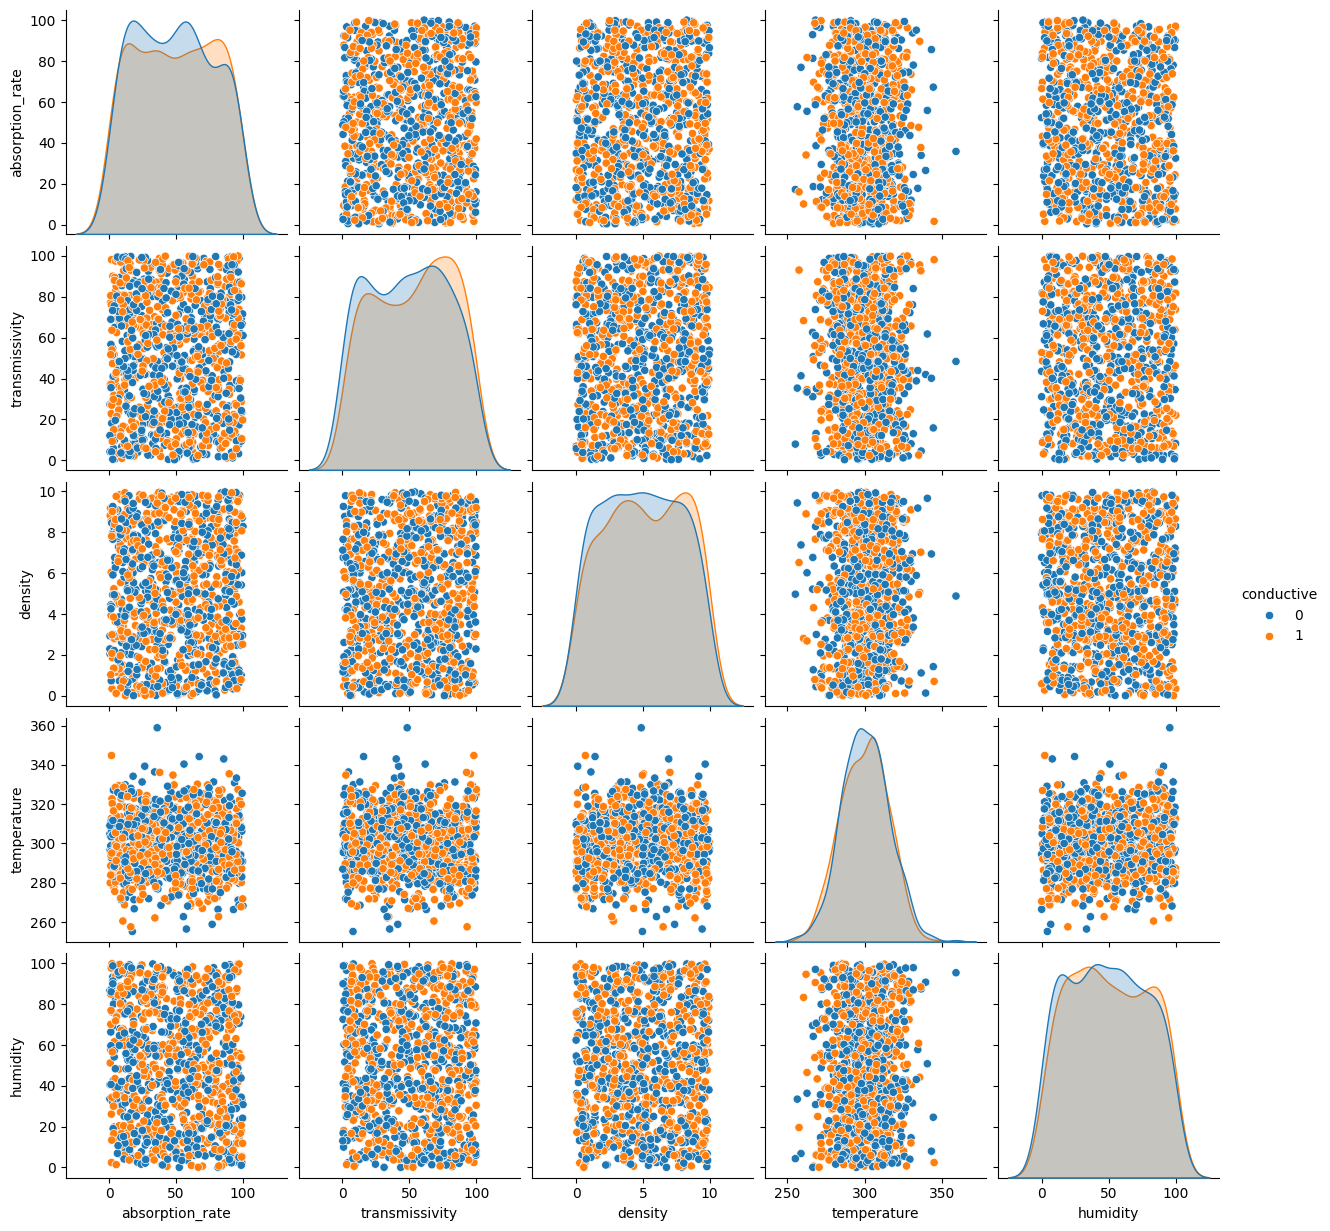

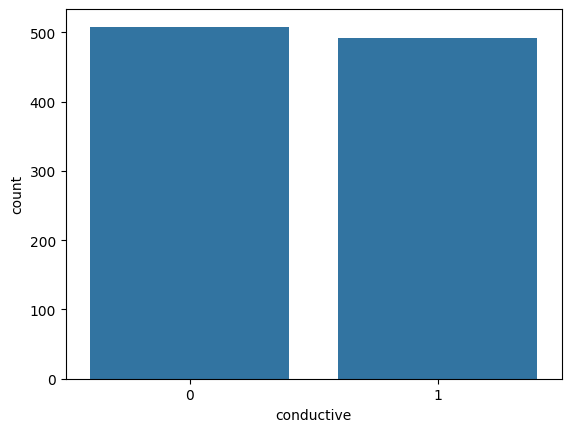

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships
sns.pairplot(data, hue='conductive')
plt.show()

# Check the distribution of the target
sns.countplot(x='conductive', data=data)
plt.show()


In [6]:
missing_values = data.isnull().sum()
missing_values

absorption_rate    0
transmissivity     0
density            0
temperature        0
humidity           0
conductive         0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[['absorption_rate', 'transmissivity', 'density', 'temperature', 'humidity']] = scaler.fit_transform(
    data_scaled[['absorption_rate', 'transmissivity', 'density', 'temperature', 'humidity']]
)

data_scaled.head()

,absorption_rate,transmissivity,density,temperature,humidity,conductive
0,-0.396301,-1.102179,-0.828489,1.053422,-0.850378,0
1,1.576957,0.119447,-0.879179,0.612262,-1.305135,0
2,0.827893,1.252992,1.390047,0.678559,0.312958,0
3,0.371251,0.771143,-0.870342,-1.362774,1.654508,0
4,-1.144685,1.025681,-0.793229,1.204822,-0.407725,1


In [10]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop('conductive', axis=1)  # Features
y = data_scaled['conductive']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

Accuracy: 0.48
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       107
           1       0.44      0.43      0.44        93

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200



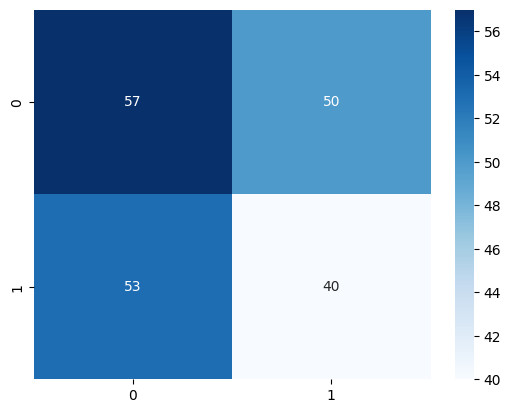

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

# 5-Fold Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean():.2f}')


Cross-Validation Scores: [0.515 0.475 0.51  0.59  0.48 ]
Average Cross-Validation Score: 0.51
